<a href="https://colab.research.google.com/github/ignaciofestino/PRIMERA-ENTREGA-PF-/blob/main/Proyecto_ParteIII__Festino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrega Trabajo Final**
 **PREDICCION DE ACCIDENTES CEREBROVASCULARES**

DATA SCIENCE I: FUNDAMENTOS PARA LA CIENCIA DE DATOS

IGNACIO FESTINO


---




# **Abstract**

 El análisis de un conjunto de datos sobre pacientes con y sin accidente cerebrovascular (ACV) ofrece una oportunidad para identificar factores clave que contribuyen a este evento crítico. Este estudio se enfoca en variables específicas: edad, hipertensión, enfermedades cardíacas preexistentes, tipo de trabajo, lugar de residencia (rural o urbano), índice de masa corporal (IMC) y hábito de fumar. Las preguntas de investigación y las hipótesis son las siguientes:

1. **¿Cuáles son los factores más significativos asociados con la ocurrencia de un ACV entre las variables consideradas?** Este análisis determinará qué variables están más estrechamente relacionadas con el riesgo de ACV.

2. **¿Cómo influyen las características individuales, como la hipertensión, enfermedades cardíacas, y el IMC, en el riesgo de ACV?** Se investigará si estos factores tienen un impacto directo o combinado en la probabilidad de sufrir un ACV.

3. **¿Existen diferencias en el riesgo de ACV según el tipo de trabajo, el lugar de residencia, y el hábito de fumar?** Se explorará si el entorno laboral y residencial, así como el hábito de fumar, afectan significativamente el riesgo de ACV.

4. **¿Qué modelos predictivos utilizando estas variables pueden estimar de manera efectiva el riesgo de ACV?** Se evaluará la capacidad de diferentes modelos predictivos para estimar el riesgo basado en las variables seleccionadas.

Las hipótesis planteadas son:

- **Hipótesis 1:** La hipertensión y las enfermedades cardíacas preexistentes están fuertemente asociadas con un mayor riesgo de ACV.
- **Hipótesis 2:** Un IMC elevado y el hábito de fumar aumentan significativamente la probabilidad de sufrir un ACV.
- **Hipótesis 3:** El tipo de trabajo y el lugar de residencia (rural vs. urbano) influyen en el riesgo de ACV, con posibles variaciones según el entorno de trabajo y las condiciones de vida.

Este estudio tiene como objetivo proporcionar una visión clara sobre los factores de riesgo del ACV y desarrollar modelos predictivos eficaces para mejorar la prevención y la intervención clínica.

# **Analisis del Data Frame y modelo de ML**

## **Analisis Data Frame**

In [ ]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# cargar el dataset
file_url= 'https://raw.githubusercontent.com/ignaciofestino/PRIMERA-ENTREGA-PF-/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_url)
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
print(df.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [ ]:
print(df.head(3))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   

   stroke  
0       1  
1       1  
2       1  


In [ ]:
print(df.tail(3))

         id  gender   age  hypertension  heart_disease ever_married  \
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5107       0  
5108       0  
5109       0  


In [ ]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# Rellenar valores nulos BMI
bmi_mean = df['bmi'].mean()
df['bmi'].fillna(bmi_mean, inplace=True)



## **Grafico de tortas: ACV por Genero**
Se buscará realizar un grafico para saber el procentaje de pacientes examinados sufrieron un ACV según su sexo biologico.

In [ ]:
# Obtener los valores únicos de la columna 'gender'
print(df['gender'].unique())

['Male' 'Female' 'Other']


In [ ]:
# Filtrar el DataFrame para excluir las filas con valores 'Other' en la columna 'gender'
df_cleaned = df[df['gender'].isin(['Male', 'Female'])]

In [ ]:
# Agrupar los datos por 'gender' y 'stroke' y contar las ocurrencias
grouped_data = df_cleaned.groupby(['gender', 'stroke']).size().unstack(fill_value=0)
print(grouped_data)

stroke     0    1
gender           
Female  2853  141
Male    2007  108


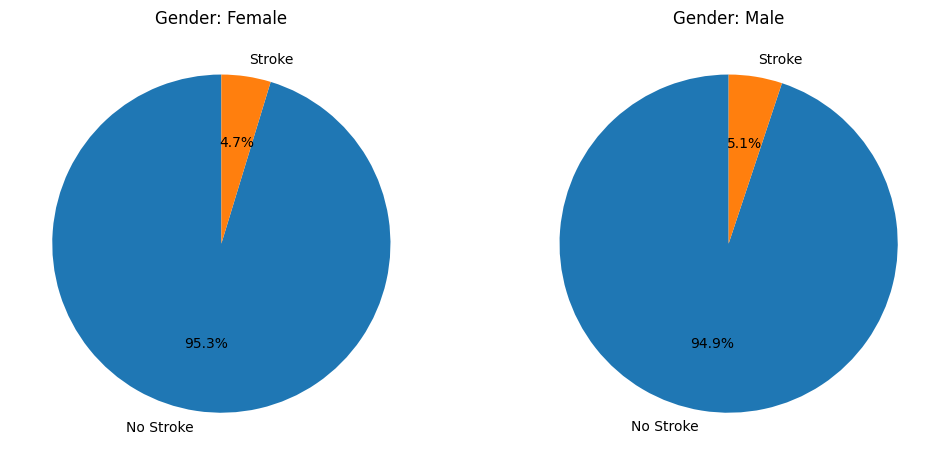

In [ ]:
# Crear el gráfico de tortas

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(grouped_data.index):
    stroke_counts = grouped_data.loc[gender]
    labels = ['No Stroke', 'Stroke']
    ax[i].pie(stroke_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(f'Gender: {gender}')

plt.show()

### **Conclusión**
Observamos que dentro de los casos investigados aproximadamente el 5% de los pacientes sufrieron un ACV en ambos sexos.

## **Grafico Histograma: ACV por Edad**
Se graficará la frecuencia de casos de ACV de acuerdo con las edades y sexo de los pacientes

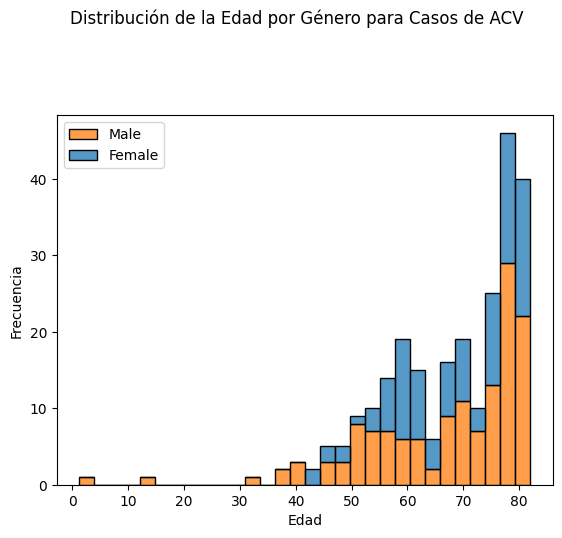

In [ ]:
#Filtrar solo los casos de ACV
df_stroke1 = df[df['stroke'] == 1]

# Gráfico de Histograma
sns.histplot(data=df_stroke1, x='age', hue='gender', multiple='stack', bins=30,legend=False)


plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.suptitle('Distribución de la Edad por Género para Casos de ACV',y=1.1)
plt.legend(labels=['Male', 'Female'])

plt.show()

###**Conclusión**
Evidenciamos que se concentran los casos de ACV entre los 75 a 85 años predominando los casos femeninos

## **Grafico de columnas: Promedio BMI**
Evaluando el BMI veremos en que promedio se encontraban aquellos pacientes que sufrieron un ACV y los que no

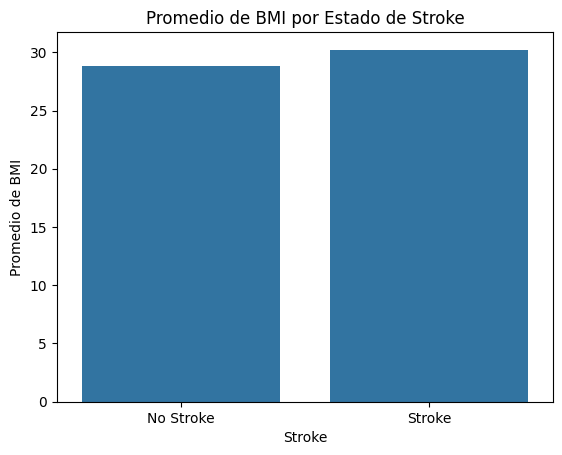

In [ ]:
# Agrupar los datos por 'stroke' y calcular el promedio de 'bmi'
bmi_promedios = df.groupby('stroke')['bmi'].mean().reset_index()

# Crear el gráfico de columnas
sns.barplot(data=bmi_promedios, x='stroke', y='bmi')

# Personalizar el gráfico
plt.xlabel('Stroke')
plt.ylabel('Promedio de BMI')
plt.title('Promedio de BMI por Estado de Stroke')
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'])  # Etiquetas para los valores de 'stroke'

# Mostrar el gráfico
plt.show()

###**Conclusión**
Notamos una leve diferencia entre los que tuvieron un ACV y los que no por lo que no podremos concluir certeramente que haya una correlación

## **Grafico de columnas: Estatus de fumador**
Se compararán a los pacientes dependiendo si fuman, fumaron o fumaban tabaco y si es que tuvieron un ACV o no

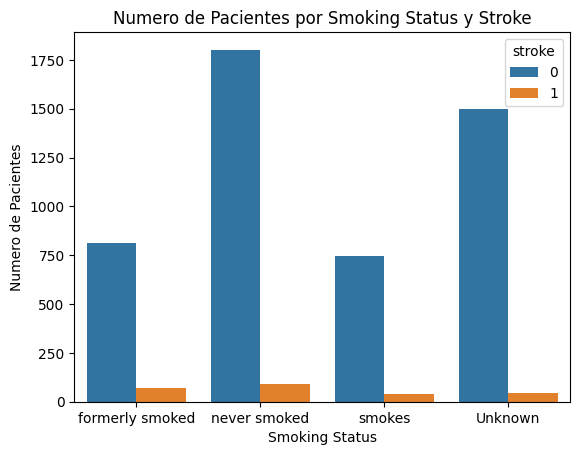

In [ ]:
# Crear el gráfico de columnas
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Numero de Pacientes')
plt.title('Numero de Pacientes por Smoking Status y Stroke')
plt.show()


###**Conclusión**
Según los datos disponibles no se observa una estrecha relación entre el estado de fumador y el ACV, pero en la realidad se espera que sí.


## **Grafico de columnas: Hipertensión y Enfermedades preexistentes**
Se graficará una comparación entre los pacientes que tuvieron un ACV y los que no de acuerdo a si son hipertensos y si padecen alguna enfermedad cardiaca preexistente.


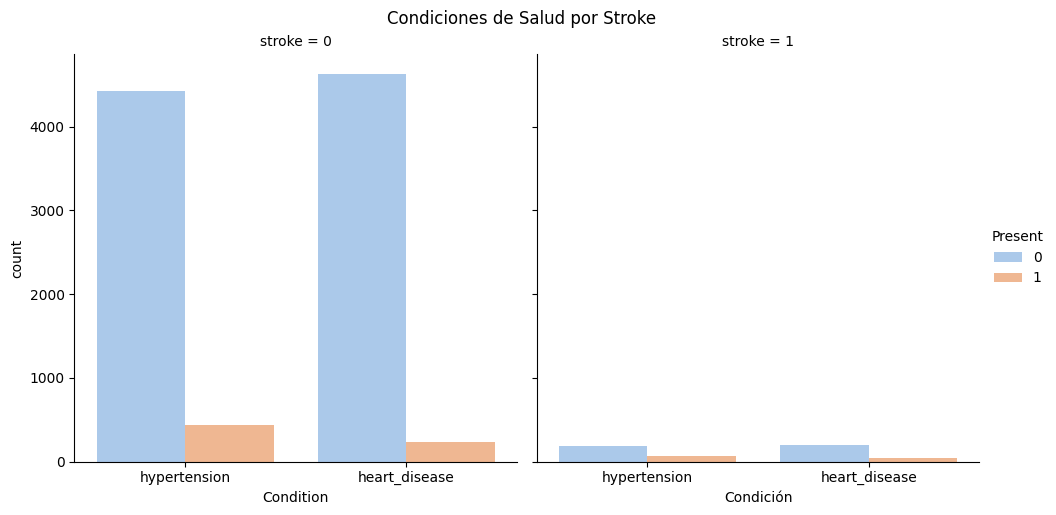

In [ ]:
# Convertir las columnas 'hypertension' y 'heart_disease' a cadenas
df['hypertension'] = df['hypertension'].astype(str)
df['heart_disease'] = df['heart_disease'].astype(str)
df_melted = df.melt(id_vars=['stroke'], value_vars=['hypertension', 'heart_disease'], var_name='Condition', value_name='Present')

# Crear el gráfico de columnas
sns.catplot(data=df_melted, x='Condition', hue='Present', col='stroke', kind='count', palette='pastel')
plt.xlabel('Condición')
plt.ylabel('Número de Casos')
plt.suptitle('Condiciones de Salud por Stroke', y=1.02)
plt.show()

###**Conclusión**
Observamos que la mayoría de las personas que padecieron un ACV padecían de hipertensión

## **Grafico de columnas: Estatus de fumador**
Se comparará la zona de residencia de los pacientes y su tipo de trabajo teniendo en cuenta si tuvieron un ACV o no

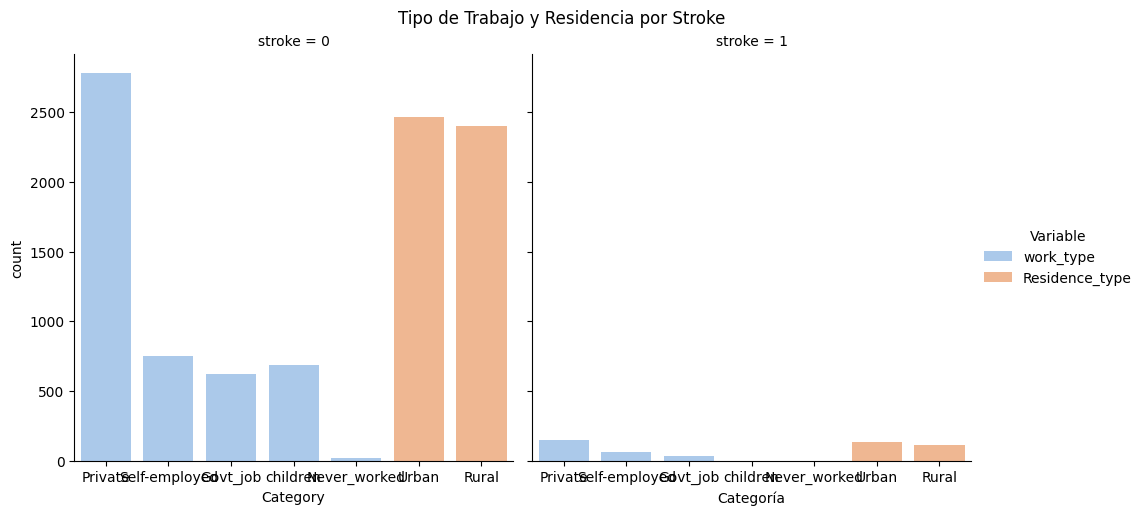

In [ ]:
# Teniendo en cuenta work_type y residence_type hacer grafico de columnas segun stroke

df_melted = df.melt(id_vars=['stroke'], value_vars=['work_type', 'Residence_type'],
                     var_name='Variable', value_name='Category')

# Crear el gráfico de columnas
sns.catplot(data=df_melted, x='Category', hue='Variable', col='stroke',
            kind='count', palette='pastel')
plt.xlabel('Categoría')
plt.ylabel('Número de Casos')
plt.suptitle('Tipo de Trabajo y Residencia por Stroke', y=1.02)
plt.show()


###**Conclusión**
Concluimos que la los que tuvieron un ACV en su mayoría habitaban en zonas urbanas y trabajaban en el ámbito privado

## **Modelo de Clasificación**

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# (avg_glucose_level, bmi y age)
X = df[['avg_glucose_level', 'bmi', 'age']]  # Características
y = df['stroke']  # Variable objetivo (1 = ACV, 0 = No ACV)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reemplazar datos con la media
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Entrenar un modelo de clasificación Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Crear un nuevo DataFrame para un paciente con avg_glucose_level, bmi y age
nuevo_paciente = pd.DataFrame({'avg_glucose_level': [180], 'bmi': [25], 'age': [65]})

nuevo_paciente = imputer.transform(nuevo_paciente)

# Predecir si el nuevo paciente sufrirá un ACV
y_pred_nuevo = modelo.predict(nuevo_paciente)
print(f'Predicción para el nuevo paciente: {y_pred_nuevo}')

Accuracy: 0.9380300065231572
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.25      0.03      0.06        89

    accuracy                           0.94      1533
   macro avg       0.60      0.51      0.51      1533
weighted avg       0.90      0.94      0.92      1533

Predicción para el nuevo paciente: [0]


### **Conclusión**
En resumen, aunque el modelo tiene una alta precisión general, su capacidad para identificar correctamente los casos de la clase 1 es limitada. Esto podría ser un área para mejorar, especialmente si la clase 1 es de particular interés en tu aplicación

### **Grafico ROC-AUC**

ROC-AUC: 0.78


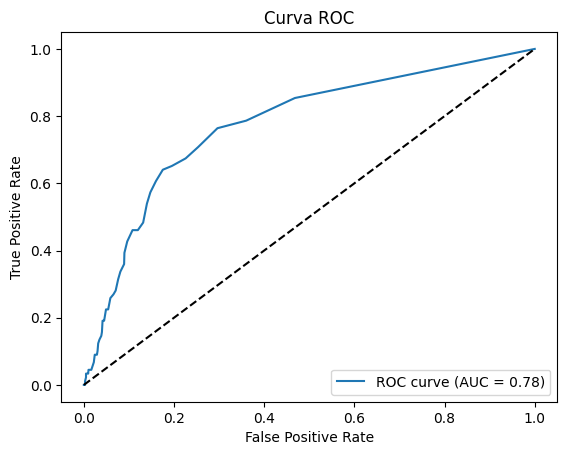

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Obtener las probabilidades predichas para la clase positiva (1)
y_pred_proba = modelo.predict_proba(X_test)[:, 1]

# Calcular el ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

# Obtener las tasas de verdaderos positivos y falsos positivos para la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### **Conclusión**
El gráfico ROC muestra que el clasificador tiene una buena capacidad para distinguir entre las dos clases, con un AUC de 0.78. Esto significa que el modelo es significativamente mejor que un clasificador aleatorio, pero aún hay margen para mejorar.


# **Conclusiones Generales**

El análisis del conjunto de datos sobre pacientes con y sin accidente cerebrovascular (ACV) ha permitido identificar varios factores de riesgo clave. Las hipótesis planteadas sugieren que la hipertensión, las enfermedades cardíacas preexistentes, un índice de masa corporal (IMC) elevado y el hábito de fumar están fuertemente asociados con un mayor riesgo de ACV. Además, se considera que el tipo de trabajo y el lugar de residencia (rural vs. urbano) también influyen en el riesgo de ACV.

El modelo predictivo desarrollado muestra una alta precisión general (93.8%), lo que indica que es efectivo en la mayoría de los casos. Sin embargo, su capacidad para identificar correctamente los casos de la clase 1 (pacientes con ACV) es limitada, como lo demuestra un f1-score bajo para esta clase. Esto sugiere que, aunque el modelo es útil, hay margen para mejorar su capacidad de detección de casos de ACV.

El gráfico ROC, con un AUC de 0.78, confirma que el modelo tiene una buena capacidad para distinguir entre las dos clases, superando significativamente a un clasificador aleatorio. No obstante, este valor también indica que hay espacio para optimizar el modelo, especialmente en la reducción de falsos negativos y el aumento de verdaderos positivos.

En resumen, el estudio proporciona una visión clara de los factores de riesgo del ACV y destaca la necesidad de mejorar el modelo predictivo para una identificación más precisa de los pacientes en riesgo teniendo en  cuenta que la mayoria de los registros pertenecen a pacientes sin ACV. Esto es crucial para desarrollar estrategias de prevención y tratamiento más efectivas.